<a href="https://colab.research.google.com/github/pallavrouth/MarketingAnalytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) is a critical initial step in the process of analyzing a dataset. It involves examining and summarizing the main characteristics, patterns, and relationships present in the data.

EDA helps analysts and data scientists understand the structure and content of the dataset before applying more complex statistical or machine learning techniques.

EDA is important because it allows us to

- **Understand the Data:** EDA helps you become more familiar with the variables in the dataset. This helps you understand the possibilities or limitations of the data in terms of testing hypothesis.

- **Detect Patterns and Anomalies:** EDA allows you to identify patterns, trends, and outliers within the data. These patterns can provide valuable insights into the underlying processes or phenomena being studied.

- **Formulate Hypotheses:** EDA helps in the formulation of new hypotheses or helps us get more validation of existing hypothesis. It acts as a bridge between initial inspection and more thorough statistical testing. For example, if you see a pattern that backs up your hypothesis, you may be inclined to perform a statistical test.

# Understanding the data - Univariate analysis

The first step in EDA is to get an understanding of **each** variables in the dataset or the variables that are crucial for analysis.

This can be done in two ways - (1) by delving into the statistical properties of each variable and (2) by vizualising the distribution of each variable.

Since this involves analyzing **one variable at a time,** these methods fall under univariate analysis.

In [ ]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

import pandas as pd

We will use the customer transaction dataset we used in the prior example.

In [ ]:
customer_info = (
    pd.read_csv("https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/transaction_customerinfo.csv")
      .rename(columns = {'past_3_years_bike_related_purchases':'past3spend'})
)



customer_info.head(n = 10)
# print(customer_info.columns)
# print(customer_info.dtypes)

## Univariate statistics

**Measure of Central Tendency:**

1. Mean: The arithmetic average of a set of values. It is calculated by summing up all the values and then dividing by the number of values.

2. Median: The middle value in a dataset when it is ordered from least to greatest. It is less sensitive to extreme values compared to the mean.

3. Mode: The value that appears most frequently in a dataset. A dataset can have no mode, one mode (unimodal), or multiple modes (multimodal).

**Measure of Data Spread:**

1. Quartiles: Values that divide a dataset into four equal parts. The first quartile (Q1) is the median of the lower half, the second quartile (Q2) is the median of the entire dataset (same as the median you mentioned), and the third quartile (Q3) is the median of the upper half.

2. Percentiles: Values that divide a dataset into 100 equal parts. The nth percentile is the value below which n percent of the data falls.
Range: The difference between the maximum and minimum values in a dataset. It gives an idea of the spread of data.

3. Interquartile Range (IQR): The difference between the third quartile (Q3) and the first quartile (Q1). It describes the range of the middle 50% of the data and is less affected by extreme values.

4. Variance: A measure of how much the values in a dataset vary from the mean. It is calculated as the average of the squared differences between each value and the mean.

5. Standard Deviation: The square root of the variance. It gives a measure of the average deviation of data points from the mean.

**Measure Distribution and Peakness:**

1. Skewness: A measure of the asymmetry of the probability distribution of a real-valued random variable. Positive skewness indicates a long tail on the right, while negative skewness indicates a long tail on the left.

2. Kurtosis: A measure of the "tailedness" of the probability distribution of a real-valued random variable. It assesses whether the data have heavy tails (leptokurtic) or light tails (platykurtic) compared to a normal distribution.






In [ ]:
# for numerical variables we can look into these above statistics
customer_info.loc[:,['age','tenure']].describe()

# the other statistics
(
    customer_info.loc[:,['age','tenure','past3spend']]
      .describe()
      .transpose()
      .rename(columns = {'25%':'Q1','50%':'Q2','75%':'Q3',
                         'min':'Min','max':'Max','std':'Std',
                         'mean':'Mean','count':'Count'})
      .assign(
              Range = lambda d: (d.Max - d.Min),
              Variance = lambda d: d.Std**2)
)
# Mean age is 45 while median age is 46. What does this mean? it typically indicates that the distribution of the variable is symmetric or approximately symmetric
# the std deviation of tenure is lower compared to age. Does this mean that values of age are more spread out than tenure? - different units

cols = ['age','tenure','past3spend']
modes = {}
for col in cols:
  modes[col] = customer_info[col].mode().to_list()
modes

For categorical variables, these statistics do not make much sense. For these types of variables, you can calculate the (1) number of categories, (2) number of unique values in a category and (3) the proportion of each category

In [ ]:
# for categorical variables we can generate tables with counts/number and name of categories
# print(customer_info.job_title.value_counts())

# do this programmatically
cols = ['gender','job_title','job_industry_category','owns_car']
descriptive_stats = {}

for col in cols:
  num_categories = customer_info[col].nunique()
  categories = customer_info[col].value_counts().to_frame()
  descriptive_stats[col] = {'num_categories':num_categories, 'categories':categories}

descriptive_stats['gender']['categories'] # comparable numbers for men and women

These statistics are helpful but **does not visually** describe the variables. Visually inspecting a data can be more insightful in terms of identifying the skewness or detecting the presence of outliers Additionally, if you wish to communicate the characteristics of a variable to stakeholders, it may be easier to explain using a picture rather than numbers.

### Grammar of Graphics

The Grammar of Graphics is a conceptual framework and a philosophy for creating and understanding data visualizations. It was developed by Leland Wilkinson and is described in his book "*The Grammar of Graphics.*" The main idea behind the Grammar of Graphics is to provide a **systematic and structured** approach to designing and constructing visualizations in a way that allows for clear and precise communication of information.

The Grammar of Graphics consists of several key components or building blocks, which can be combined and customized to create a wide variety of visualizations. These components include:

1. **Data:** The raw data that you want to visualize, usually organized in a tabular format with rows and columns.

2. **Aesthetics:** Mapping data variables to visual properties such as position, size, color, shape, and transparency. Aesthetics define how data values are represented visually.

3. **Geometries (Geoms):** Geoms represent the geometric shapes that will be used to visualize the data. Examples include points, lines, bars, polygons, and areas.

4. **Statistics:** Statistics involve transforming and summarizing the data before visualization. For example, you might compute means, medians, or proportions to display aggregated information.

5. **Scales:** Scales determine how data values are mapped to the visual properties. They include axes, legends, and color scales, which provide context and interpretation for the visualization.

6. **Faceting:** Faceting involves breaking the data into subsets and creating multiple small visualizations (facets) to compare them. Facets can be arranged in grids or other layouts.

7. **Themes:** Themes control the overall appearance of the visualization, including colors, fonts, and gridlines, to ensure consistency and make the visualization visually appealing.

This idea is implemented very nicely in the `ggplot2` library in R. Using this library makes creating graphics very methodical and organized.

The syntax of python's OG plotting library `matplotlib` does not exactly embrace this ideology - making creating grahics a bit unintuitive and cluncky. Luckily, there are libraries in python that resemble `ggplot2` capabilities very cloesly. In this course we will use one such library called `plotnine`.

In [ ]:
from plotnine import (
    ggplot,
    aes,
    geom_histogram,
    geom_rug,
    geom_bar,
    coord_flip,
    after_stat,
    geom_boxplot,
    geom_violin,
    geom_point,
    geom_line,
    geom_tile,
    facet_wrap
)

## Univariate Graphs

Going back to creating visual descriptions, since we are dealing with one variable at this stage, we want to use either **histograms or boxplots for numerical variables** or **bar graphs for categorical variables**.

### Histograms

A histogram is a graphical representation of the distribution of a dataset. It provides a visual summary of the frequency or count of data points falling within specified intervals, or "bins," along the range of values in the dataset. Histograms are particularly useful for understanding the shape, central tendency, variability, and potential outliers in a dataset.

**Construction:** The range of values in the dataset is divided into a set of non-overlapping intervals (bins). The bins are usually of equal width, although they can vary in width depending on the data and the goals of visualization. The frequency (or count) of data points falling within each bin is determined.

**Interpretation:** The height of each bar in the histogram represents the frequency or count of data points in the corresponding bin.
The horizontal axis represents the range of values, and the vertical axis represents the frequency or count. The shape of the histogram can reveal important characteristics of the data distribution.

In [ ]:
(
    ggplot(customer_info, # data
              aes(x = 'age')) + # aesthetics
      geom_histogram() # geometries
)

In [ ]:
# x axis age values binned and y axis count for each value
# grammar of graphics
(
    ggplot(customer_info, # data
              aes(x = 'age')) + # aesthetics
      geom_histogram() # geometries
)

# you can choose to change the width of the bins
(
    ggplot(customer_info, aes(x = 'age')) +
      geom_histogram(binwidth = 1.01)
)

# the count for each bin normalized count
(
    ggplot(customer_info, aes(x = 'age', y = after_stat('ncount'))) +
      geom_histogram(binwidth = 1.01)
)

# kernel density of each bin
(
    ggplot(customer_info, aes(x = 'age', y = after_stat('density'))) +
      geom_histogram(binwidth = 1.01)
)


# proportion of each bin
(
    ggplot(customer_info, aes(x = 'age', y = after_stat('width*density'))) +
      geom_histogram(binwidth = 1.01)
)

# another way to visualize
(
    ggplot(customer_info, aes(x = 'age')) +
      geom_histogram() +
      geom_rug()
)

### Boxplots

A box plot, also known as a box-and-whisker plot, is a graphical representation that provides a concise summary of the distribution and key statistical properties of a dataset. It displays the range, median, quartiles, and potential outliers of the data in a visually effective manner. Box plots are particularly useful for comparing the distribution of multiple datasets or for identifying potential outliers in a single dataset.

Here's how a box plot is constructed and interpreted:

**Construction:**

The box plot consists of a rectangular "box" and two "whiskers" that extend from the box. The box represents the interquartile range (IQR), which contains the middle 50% of the data. It spans from the first quartile (Q1) to the third quartile (Q3).

A horizontal line (the "median") is drawn inside the box, indicating the value that separates the lower and upper halves of the data.
The whiskers extend from the edges of the box to the minimum and maximum data values within a certain range. The exact length of the whiskers can vary depending on the implementation and the presence of potential outliers.

Potential outliers, which are data points outside a certain range from the box, are depicted as individual points or dots.

**Interpretation:**
The box gives an overview of the spread and central tendency of the data, with the median providing a measure of the central value.
The length of the whiskers provides information about the data's variability beyond the interquartile range.

Outliers are clearly identified as individual points beyond the whiskers.
The box plot can help you assess symmetry or skewness in the data distribution.

In [ ]:
(
    ggplot(customer_info, aes(x = 0, y = 'age')) +
      geom_boxplot()
)

(
    ggplot(customer_info, aes(x = 0, y = 'age')) +
      geom_violin()
)

### Barplots

A bar plot, also known as a bar chart, is a graphical representation used to display categorical data. It uses rectangular bars of varying heights to represent the frequency, count, or proportion of different categories in a dataset. Bar plots are useful for visually comparing the values of different categories and understanding their relationships.

Here's how a bar plot is constructed and interpreted:

**Construction:**

The horizontal axis (x-axis) represents the different categories or groups being compared. The vertical axis (y-axis) represents the frequency, count, or proportion of each category.

Rectangular bars are drawn for each category, with the height of the bar corresponding to the value being represented.

**Interpretation:**

Bar plots make it easy to compare the relative sizes of different categories. The length of each bar reflects the quantity or proportion of the corresponding category.

Bar plots can be oriented vertically or horizontally, depending on the data and the desired presentation.


In [ ]:
# construction of bar plot
(
    ggplot(customer_info, aes(x = 'job_industry_category')) +
      geom_bar()
)


(
    ggplot(customer_info, aes(x = 'job_industry_category')) +
      geom_bar() +
      coord_flip()
)

# sort the labels
job_industry_list = customer_info.job_industry_category.value_counts().index.to_list()
job_industry_list

plot_data = (
    customer_info
      #.dropna(axis = 0, subset = ['job_industry_category'])
      .assign(job_industry_cat = lambda d: pd.Categorical(d['job_industry_category'], categories = job_industry_list))
)
plot_data.dtypes

(
    ggplot(plot_data, aes(x = 'job_industry_cat')) +
      geom_bar() +
      coord_flip()
) # highest in manufacturing

# Detecting patterns and trends - Mutlivariate Analysis

After you get a feeling of the statistical properties of each variable, the next step would to 'hunt' for hidden patterns or trends that could help you answer research questions.

These hidden patterns or trends often reveal themselves when we examine the **relationship between** two or more variables. Similar to univariate analysis, there are statistical and graphical methods to explore relationships. And, since exploring these relationships involve two or more variables they are called multivariate analysis.

## Multivariate Statistics

Covariance measures how two variables change together. It indicates the direction of the linear relationship between variables. A positive covariance indicates that when one variable increases, the other tends to increase as well, while a negative covariance indicates that when one variable increases, the other tends to decrease. However, the magnitude of covariance is influenced by the scale of the variables, making it difficult to interpret on its own.

Correlation, on the other hand, is a standardized version of covariance. It scales the covariance by the standard deviations of the variables, resulting in a value between -1 and 1. Correlation is a more interpretable measure of the strength and direction of the linear relationship between variables. A correlation of 1 indicates a perfect positive linear relationship, a correlation of -1 indicates a perfect negative linear relationship, and a correlation of 0 indicates no linear relationship.

In [ ]:
print("\nCovariance Matrix:")
customer_info.cov(numeric_only = True)

(
    customer_info
      .drop(["customer_id"], axis = 1)
).cov(numeric_only = True)

print("\nCorrelation Matrix:")
customer_info.corr(numeric_only = True)

(
    customer_info
      .drop(["customer_id"], axis = 1)
).corr(numeric_only = True)

# Interpreting this substantively, it implies that, on average, as age increases, the number of past 3 bike-related purchases tends to decrease. Conversely, as age decreases, the number of past 3 bike-related purchases tends to increase.
# This negative covariance **suggests** that older individuals may be less likely to make recent bike-related purchases compared to younger individuals.

## 2D dimensional graphs

One way to detect patterns in the data visually is to examine two-dimensional (2D) plots. These plots involve the representation of data points using two different variables, one on the x-axis and the other on the y-axis. The choice of plot type depends on the types of variables placed on each axis, and different types of plots can provide insights into various relationships within the data.

There are 4 common types of 2D plots: scatter plot, time series plot and box plots and heat maps.


### Scatter plot

A scatter plot is a graphical representation that displays individual data points as dots on a two-dimensional plane. It is used to visually explore the relationship between two continuous variables. Here's how a scatter plot is constructed and how it can be interpreted:

**Construction of a Scatter Plot:**

1. Axis Setup: Choose one variable to be represented on the x-axis and another variable to be represented on the y-axis.

2. Data Points: For each pair of values (x, y) from your dataset, plot a single point at the intersection of the corresponding x and y values on the graph.

**Interpretation of a Scatter Plot:**

1. Correlation: Observe the general trend or pattern formed by the data points. If the points form a roughly straight line (either positively or negatively sloped), it indicates a linear correlation between the variables. If the points are scattered without a clear pattern, there might be little or no correlation.

2. Direction of Relationship: If the points slant upwards from left to right, it suggests a positive correlation. This means that as one variable increases, the other tends to increase as well. If the points slant downwards from left to right, it indicates a negative correlation, where one variable increases as the other decreases.

3. Strength of Relationship: The closeness of the points to the trend line (if there is one) indicates the strength of the relationship. Points that are tightly clustered around the trend line suggest a strong correlation, while points that are more spread out indicate a weaker correlation.

In [ ]:
transactions = pd.read_csv("https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/transaction_transactions.csv", index_col = False)

def toFloat(x):
  if isinstance(x, str):
    float_str = x.replace('$','').replace(',','')
    return float(float_str)
  else:
    return x

plot_data = (
    transactions
      .assign(fstandard_cost = lambda d: d.standard_cost.apply(toFloat))
)

(
    ggplot(plot_data, aes(x = 'list_price', y = 'fstandard_cost')) +
      geom_point()
)

# there is a positive relationship - why? Is it obvious?

### Time series

A time series is similar to a scatter plot in that it explains the relationship between 2 continuous variables. It is also similar in terms of how it constructed and interpreted. But it has 2 main differences - the x axis is always time and the points are connected with a line to better represent the trend over time.

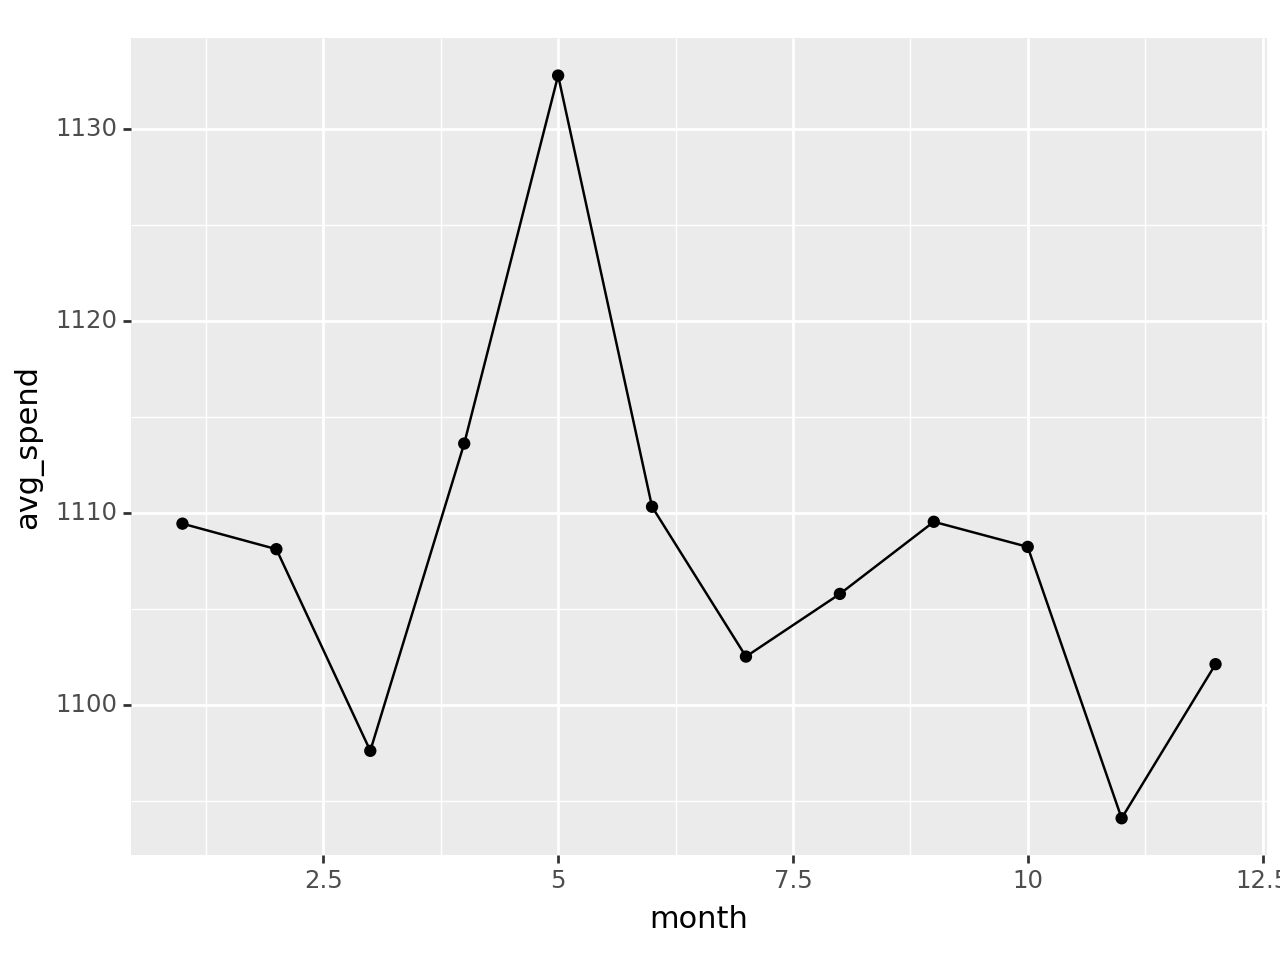

<Figure Size: (640 x 480)>

In [ ]:
plot_data = (
    transactions
      .assign(ftransaction_date = lambda d: pd.to_datetime(d.transaction_date, format = '%d/%m/%Y'),
              year = lambda d: d.ftransaction_date.dt.year,
              month = lambda d: d.ftransaction_date.dt.month)
      .groupby(['year','month'], as_index = False)
          .agg(avg_spend = ('list_price','mean'))
)

(
    ggplot(plot_data, aes(x = 'month', y = 'avg_spend')) +
      geom_point() +
      geom_line()
)

### Box plots

What if one of the variable is continuous and the other one is discrete or categorical? A time series or scatter plot is not appropriate. In this scenario we can use a boxplot where x axis is the categories and y axis is the continous variable. Unlike the univariate box plot, here the box and whiskers represent the distribution of the y-axis (continous) variable within each of the x-axis categories.

In [ ]:
plot_data = customer_info.dropna()

(
    ggplot(plot_data, aes(x = 'job_industry_category', y = 'past3spend')) +
      geom_boxplot() +
      coord_flip()
)

Scatter and time series graphs give us a great way to visualize the relationship between two variables. However, to get deeper insights we may need more perspective. In other words, we need to add more variables into our graphs. But, how do we do this in a 2D plot?

Grammar of graphics provides a neat solution. We can exploit the 'aesthetics' of data points to add more information to an existing graph. One can do this by change the (1) shape, (2) size or (3) color of the data points depending on the **levels** of a 3rd variable.

It is important to stress of the word **levels** because this third variable needs to be a categorical variable. The reason are two fold (1) to make it easier to detect patterns and (3) limitation related to the possibilities of different types of shapes or sizes that could be used.

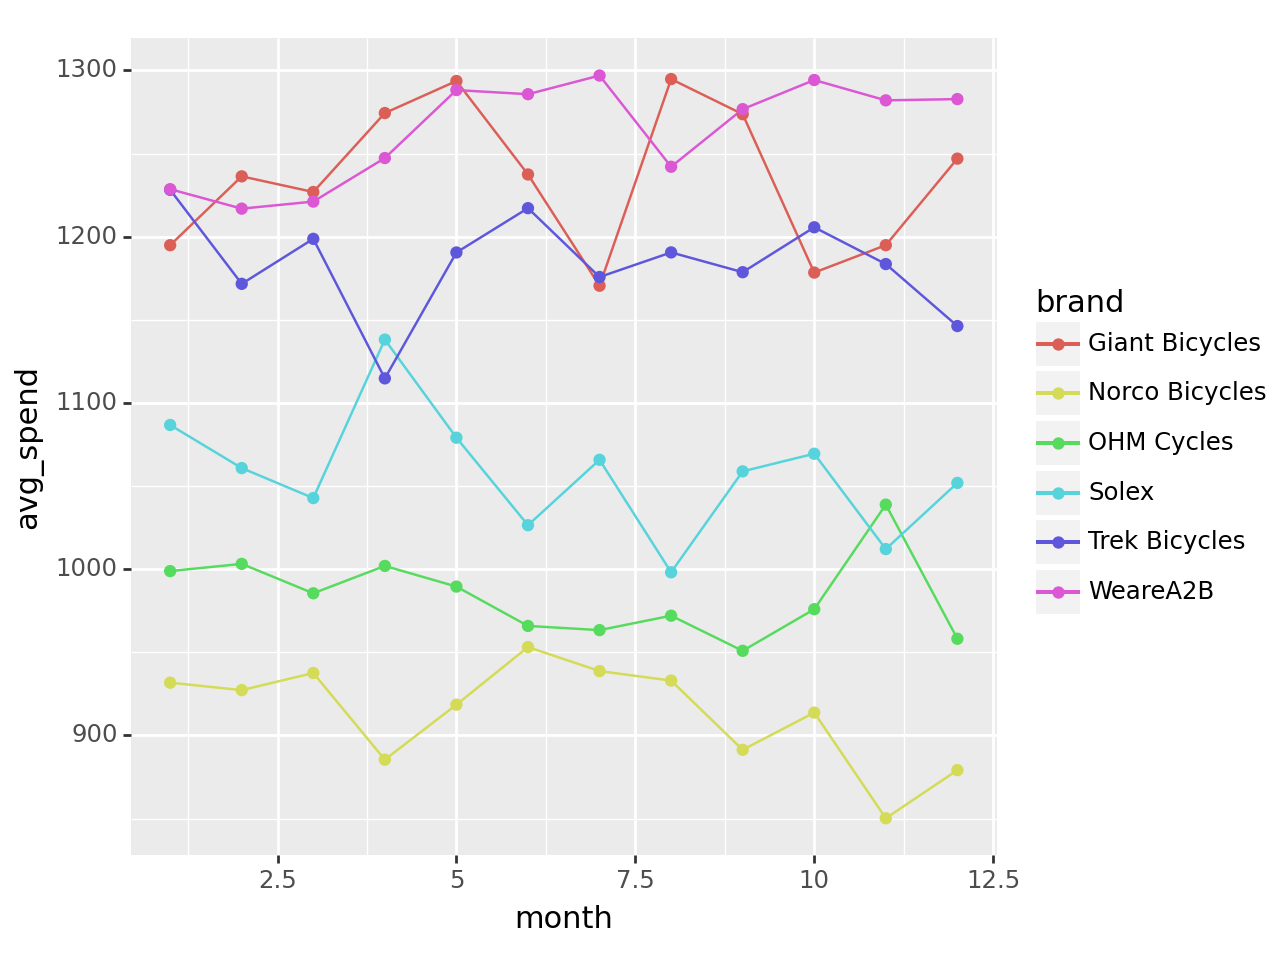

<Figure Size: (640 x 480)>

In [ ]:
plot_data = (
    transactions
      .assign(ftransaction_date = lambda d: pd.to_datetime(d.transaction_date, format = '%d/%m/%Y'),
              year = lambda d: d.ftransaction_date.dt.year,
              month = lambda d: d.ftransaction_date.dt.month)
      .groupby(['brand','year','month'], as_index = False)
          .agg(avg_spend = ('list_price','mean'))
)

(
    ggplot(plot_data, aes(x = 'month', y = 'avg_spend', color = 'brand')) +
      geom_line() +
      geom_point()
)



In [ ]:
def toFloat(x):
  if isinstance(x, str):
    float_str = x.replace('$','').replace(',','')
    return float(float_str)
  else:
    return x

plot_data = (
    transactions
      .dropna()
      .assign(fstandard_cost = lambda d: d.standard_cost.apply(toFloat))
)

(
    ggplot(plot_data, aes(x = 'list_price', y = 'fstandard_cost', size = 'product_size')) +
      geom_point(alpha = 0.5)
)

Adding more information to a graph can sometimes make it look cluttered and difficult to interpret. In such cases, a useful technique to manage complexity and enhance visualization is to use facets. Facets involve creating multiple smaller subplots or panels, each representing a subset of the data.

This allows you to display additional information without overwhelming the viewer with a single crowded plot. Facets are particularly helpful when you want to explore patterns and relationships within subsets of the data.a graph look more messy. A adding more information to a graph can sometimes make it look cluttered and difficult to interpret.

In such cases, a useful technique to manage complexity and enhance visualization is to use facets. Facets involve creating multiple smaller subplots or panels, each representing a subset of the data. This allows you to display additional information without overwhelming the viewer with a single crowded plot. Facets are particularly helpful when you want to explore patterns and relationships within subsets of the data.

In [ ]:
(
    ggplot(plot_data, aes(x = 'list_price', y = 'fstandard_cost')) +
      geom_point() +
      facet_wrap(facets = 'product_size')
)

### Heat Map

A heat map is a visual representation of data in a matrix-like form, where each cell is colored according to the value it represents. Heat maps are commonly used to visualize relationships, patterns between two categorical variables. Heat maps are also a great demonstration of how colors are used to add more context to graphs


Here's how a heat map is constructed and how it can be interpreted:

**Construction of a Heat Map:**

1. Color Mapping: Assign colors to the cells based on the numerical values they contain. Typically, a color scale is used to map the range of values to a color gradient. Darker colors represent higher values, and lighter colors represent lower values.

2. Color Key: Include a color key or legend that indicates the numerical range associated with each color on the heat map.

3. Row and Column Labels: Label the rows and columns with appropriate category names to provide context for the data being represented.

**Interpretation of a Heat Map:**

1. Color Intensity: The intensity of color in each cell reflects the magnitude of the numerical value it represents. Darker colors indicate higher values, while lighter colors indicate lower values.

2. Patterns and Relationships: Examine the patterns of color across the heat map. Look for clusters of similar colors, as they indicate groups of data points with similar values. These clusters can reveal correlations, trends, and relationships within the data.

3. Comparisons: Compare the color gradients across rows and columns to identify trends or discrepancies. Heat maps make it easy to spot differences or similarities between categories.



In [ ]:
plot_data = (
    transactions
      .groupby(['brand','product_size'], as_index = False)
          .agg(avg_spend = ('list_price','mean'))
)

plot_data

(
    ggplot(plot_data, aes(y = 'brand', x = 'product_size')) +
      geom_tile(aes(fill = 'avg_spend'))
)

### Cleaning up plots - themes

So far we have seen....